In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

### 1. Data Reading 

In [2]:
df = pd.read_csv('../data/NIFTY_2008_2020.csv')

In [3]:
df.head()

,Instrument,Date,Time,Open,High,Low,Close
0,NIFTY,20080101,09:55,6138.60,6154.60,6138.60,6148.90
1,NIFTY,20080101,09:56,6149.75,6149.75,6132.80,6132.80
2,NIFTY,20080101,09:57,6138.25,6138.25,6127.95,6127.95
3,NIFTY,20080101,09:58,6127.15,6127.15,6120.90,6120.90
4,NIFTY,20080101,09:59,6118.05,6118.05,6113.55,6113.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178891 entries, 0 to 1178890
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Instrument  1178891 non-null  object 
 1   Date        1178891 non-null  int64  
 2   Time        1178891 non-null  object 
 3   Open        1178891 non-null  float64
 4   High        1178891 non-null  float64
 5   Low         1178891 non-null  float64
 6   Close       1178891 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 63.0+ MB


In [5]:
df.columns
# derive correlation
df[['Open','High','Low','Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999999,0.999999,0.999999
High,0.999999,1.000000,0.999999,0.999999
Low,0.999999,0.999999,1.000000,0.999999
Close,0.999999,0.999999,0.999999,1.000000


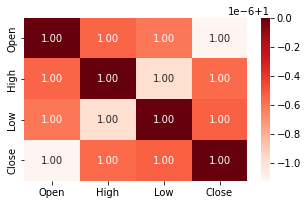

In [6]:
plt.figure(figsize=(5,3))
sns.heatmap(df[['Open','High','Low','Close']].corr(),cmap=plt.cm.Reds,annot=True,fmt='.2f')
# plt.title('Heatmap displaying the relationship between the features of the dataset',
#          fontsize=11)
plt.show()

### 2. Data Pre-processing

In [7]:
# converting the date column to right format

date_format = '%Y%m%d'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)

In [8]:
df['Timestamp'] = df.apply(lambda r : pd.datetime.combine(r['Date'],datetime.strptime(r['Time'],'%H:%M').time()),1)

/var/folders/rl/36p1mt653t52j1b28cn98vtw0000gp/T/ipykernel_96118/3581200122.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Timestamp'] = df.apply(lambda r : pd.datetime.combine(r['Date'],datetime.strptime(r['Time'],'%H:%M').time()),1)


In [9]:
df.head()

,Instrument,Date,Time,Open,High,Low,Close,Timestamp
0,NIFTY,2008-01-01,09:55,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00
1,NIFTY,2008-01-01,09:56,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00
2,NIFTY,2008-01-01,09:57,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00
3,NIFTY,2008-01-01,09:58,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00
4,NIFTY,2008-01-01,09:59,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00


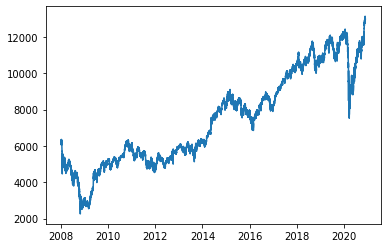

In [10]:
plt.plot(df['Timestamp'],df['Close'])
plt.show()

#### Clean the df by removing unwanted columns
##### Instrument, Date, Time columns to be removed

In [11]:
df = df.drop(['Instrument', 'Time'], axis=1)

In [12]:
df.head()

,Date,Open,High,Low,Close,Timestamp
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00


### 3. Feature Engineering

#### Calculating simple moving average for 30 and 90 days for Close column

In [13]:
SMA1Month = 1
SMA3Month = 3

df['CloseSMA30'] = df['Close'].rolling(min_periods=1, center=True, window=SMA1Month).mean()
df['CloseSMA90'] = df['Close'].rolling(min_periods=1, center=True, window=SMA3Month).mean()

df.head()

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178891 entries, 0 to 1178890
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date        1178891 non-null  datetime64[ns]
 1   Open        1178891 non-null  float64       
 2   High        1178891 non-null  float64       
 3   Low         1178891 non-null  float64       
 4   Close       1178891 non-null  float64       
 5   Timestamp   1178891 non-null  datetime64[ns]
 6   CloseSMA30  1178891 non-null  float64       
 7   CloseSMA90  1178891 non-null  float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 72.0 MB


#### Calculating HL_diff,

In [15]:
# HL_diff = H_Max - H_Min
# where, H_Max = maximum high prce of month
# H_Min = minimum low price of month

df2 = df[['Timestamp','Date','High','Low']]
df2.head()

,Timestamp,Date,High,Low
0,2008-01-01 09:55:00,2008-01-01,6154.60,6138.60
1,2008-01-01 09:56:00,2008-01-01,6149.75,6132.80
2,2008-01-01 09:57:00,2008-01-01,6138.25,6127.95
3,2008-01-01 09:58:00,2008-01-01,6127.15,6120.90
4,2008-01-01 09:59:00,2008-01-01,6118.05,6113.55


In [16]:
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Day'] = pd.DatetimeIndex(df2['Date']).dayofweek

/var/folders/rl/36p1mt653t52j1b28cn98vtw0000gp/T/ipykernel_96118/2196087070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = pd.DatetimeIndex(df2['Date']).month
/var/folders/rl/36p1mt653t52j1b28cn98vtw0000gp/T/ipykernel_96118/2196087070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.DatetimeIndex(df2['Date']).year
/var/folders/rl/36p1mt653t52j1b28cn98vtw0000gp/T/ipykernel_96118/2196087070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [17]:
df2

,Timestamp,Date,High,Low,Month,Year,Day
0,2008-01-01 09:55:00,2008-01-01,6154.60,6138.60,1,2008,1
1,2008-01-01 09:56:00,2008-01-01,6149.75,6132.80,1,2008,1
2,2008-01-01 09:57:00,2008-01-01,6138.25,6127.95,1,2008,1
3,2008-01-01 09:58:00,2008-01-01,6127.15,6120.90,1,2008,1
4,2008-01-01 09:59:00,2008-01-01,6118.05,6113.55,1,2008,1
...,...,...,...,...,...,...,...
1178886,2020-11-27 15:28:00,2020-11-27,12947.00,12927.95,11,2020,4
1178887,2020-11-27 15:29:00,2020-11-27,12947.90,12928.35,11,2020,4
1178888,2020-11-27 15:30:00,2020-11-27,12948.60,12933.85,11,2020,4
1178889,2020-11-27 15:31:00,2020-11-27,12941.95,12941.95,11,2020,4


In [18]:
df2_group = df2.groupby(['Month','Year']).agg({'High':'max','Low':'min'})
df2_group.reset_index()
df2_group = df2_group.rename(columns={'High':'H_Max','Low':'L_Min'})

In [19]:
df3 = pd.merge(df2, df2_group, how='left', on=['Month', 'Year'])

In [20]:
df3

,Timestamp,Date,High,Low,Month,Year,Day,H_Max,L_Min
0,2008-01-01 09:55:00,2008-01-01,6154.60,6138.60,1,2008,1,6356.20,4450.15
1,2008-01-01 09:56:00,2008-01-01,6149.75,6132.80,1,2008,1,6356.20,4450.15
2,2008-01-01 09:57:00,2008-01-01,6138.25,6127.95,1,2008,1,6356.20,4450.15
3,2008-01-01 09:58:00,2008-01-01,6127.15,6120.90,1,2008,1,6356.20,4450.15
4,2008-01-01 09:59:00,2008-01-01,6118.05,6113.55,1,2008,1,6356.20,4450.15
...,...,...,...,...,...,...,...,...,...
1178886,2020-11-27 15:28:00,2020-11-27,12947.00,12927.95,11,2020,4,13145.85,11557.40
1178887,2020-11-27 15:29:00,2020-11-27,12947.90,12928.35,11,2020,4,13145.85,11557.40
1178888,2020-11-27 15:30:00,2020-11-27,12948.60,12933.85,11,2020,4,13145.85,11557.40
1178889,2020-11-27 15:31:00,2020-11-27,12941.95,12941.95,11,2020,4,13145.85,11557.40


In [21]:
df3 = df3.drop(['Date','High','Low',], axis=1)
df = pd.merge(df, df3, how='left', on=['Timestamp'])

In [22]:
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40


In [23]:
df['HL_Diff'] = df.apply(lambda x: x['H_Max'] - x['L_Min'], axis=1)

In [24]:
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15,1906.05
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15,1906.05
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15,1906.05
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15,1906.05
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15,1906.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40,1588.45
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40,1588.45
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40,1588.45
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40,1588.45


#### Calculating CO_Mean

In [25]:
# CO_Mean is defined by monthwise mean of difference of Close and Open values

# calculating the difference for close and open for each row in the df
df['CO_Diff'] = df.apply(lambda x: x['Close'] - x['Open'], axis=1)
df.head()

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff,CO_Diff
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.2,4450.15,1906.05,10.30
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.2,4450.15,1906.05,-16.95
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.2,4450.15,1906.05,-10.30
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.2,4450.15,1906.05,-6.25
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.2,4450.15,1906.05,-4.15


In [26]:
# calculating monthwise mean of CO_diff as CO_Mean

df5 = df[['Month','Year','CO_Diff']]
df5 = df5.groupby(['Month','Year']).agg({'CO_Diff':'mean'})
df5 = df5.reset_index()

df = df.drop('CO_Diff', axis=1)


df = pd.merge(df,df5,how="left",on=['Month','Year'])
df = df.rename(columns={'CO_Diff':'CO_Mean'})
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff,CO_Mean
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15,1906.05,-0.092969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40,1588.45,0.026115


In [27]:
df['Day'].value_counts()

1    240649
2    239342
3    237615
0    237467
4    236478
5      1464
6       126
Name: Day, dtype: int64

In [28]:
# Values 5 and 6 correspond to saturday and sunday in the 'Day' columne,
# The stock exchange doesn't operate on weekends but on certain saturdays and sundays brokers test their systems,
# hence these values are captured in the dataset. It is safe to discard these values

df = df.loc[~((df['Day']==5) | (df['Day']==6)),:]
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff,CO_Mean
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15,1906.05,-0.092969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40,1588.45,0.026115


### 4. Scale and transform the data

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
scaler = StandardScaler()

In [31]:
df.shape

(1191551, 15)

In [32]:
train_size = int(df.shape[0]*90/100)
df_train = df[:train_size]
df_test = df[train_size+1:]

In [33]:
df_train.shape, df_test.shape

((1072395, 15), (119155, 15))

In [34]:
df_train_to_scaled = df_train.drop(['Date','Timestamp','Month','Year','H_Max','L_Min'],axis=1)
df_test_to_scaled = df_test.drop(['Date','Timestamp','Month','Year','H_Max','L_Min'],axis=1)

In [35]:
df_train_to_scaled.head()

,Open,High,Low,Close,CloseSMA30,CloseSMA90,Day,HL_Diff,CO_Mean
0,6138.60,6154.60,6138.60,6148.90,6148.90,6140.850000,1,1906.05,-0.092969
1,6149.75,6149.75,6132.80,6132.80,6132.80,6136.550000,1,1906.05,-0.092969
2,6138.25,6138.25,6127.95,6127.95,6127.95,6127.216667,1,1906.05,-0.092969
3,6127.15,6127.15,6120.90,6120.90,6120.90,6120.916667,1,1906.05,-0.092969
4,6118.05,6118.05,6113.55,6113.90,6113.90,6119.383333,1,1906.05,-0.092969


In [36]:
df_test_to_scaled.head()

,Open,High,Low,Close,CloseSMA30,CloseSMA90,Day,HL_Diff,CO_Mean
1073481,11013.10,11013.70,11001.20,11003.65,11003.65,11008.183333,1,544.3,-0.014065
1073482,11003.10,11009.30,10999.80,11007.95,11007.95,11002.616667,1,544.3,-0.014065
1073483,11007.85,11007.85,10995.95,10996.25,10996.25,10997.066667,1,544.3,-0.014065
1073484,10996.50,10998.10,10987.00,10987.00,10987.00,10992.950000,1,544.3,-0.014065
1073485,10987.20,10995.60,10986.70,10995.60,10995.60,10994.416667,1,544.3,-0.014065


In [37]:
df_train_scaled = scaler.fit(df_train_to_scaled)
df_train_scaled = scaler.transform(df_train_to_scaled)
print(df_train_scaled.shape)

(1072395, 9)


In [38]:
df_train_scaled.shape

(1072395, 9)

In [39]:
# scaled the test data

df_test_scaled = scaler.fit(df_test_to_scaled)
df_test_scaled = scaler.transform(df_test_to_scaled)
print(df_test_scaled)

[[-0.09400185 -0.09642187 -0.10151676 ... -0.73901111 -0.66511861
   0.42311658]
 [-0.10284578 -0.10031724 -0.10275364 ... -0.73901111 -0.66511861
   0.42311658]
 [-0.09864492 -0.10160095 -0.10615506 ... -0.73901111 -0.66511861
   0.42311658]
 ...
 [ 1.60695101  1.61656807  1.60595107 ...  1.40309219  0.58559135
   1.13530138]
 [ 1.61185939  1.61068075  1.6131073  ...  1.40309219  0.58559135
   1.13530138]
 [ 1.61283222  1.63458417  1.61407913 ...  1.40309219  0.58559135
   1.13530138]]


In [40]:
def split_sequence(sequence, look_back, forecast_horizon):
    X, y = list(), list()
    for i in range(len(sequence)): 
        lag_end = i + look_back
        forecast_end = lag_end + forecast_horizon
        if forecast_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
        X.append(seq_x)
        y.append(seq_y)
    #return np.array(X), np.array(y)
    return X,y

In [41]:
len(list(df_train_to_scaled.columns))

9

In [43]:
# Take into consideration last 90 days, and perform forecasting for next 7 days

# Nifty operates from 9:30am to 3:30 pm on normal trading days
hrs_of_operation = 6.25
#calculating minutes in a normal trading day
mins_in_a_day = hrs_of_operation*60

# creating a 7 day minute-wise window
LOOK_BACK = int(90*mins_in_a_day)
# LOOK_BACK = int(1*mins_in_a_day)


# forecast for next 1 days
FORECAST_RANGE = int(1*mins_in_a_day)
# FORECAST_RANGE = 15

n_features = len(list(df_train_to_scaled.columns))

X_train, y_train = split_sequence(df_train_scaled, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
X_test, y_test = split_sequence(df_test_scaled, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)


In [ ]:
X_train_np = np.array(X_train)

#### Creating the train and test datasets

In [116]:
X = []
Y = []

window_size=100

for i in range(1 , len(df_train) - window_size -1 , 1):
    first = df_train.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df_train.iloc[i + j, 2] - first) / first)
    temp2.append((df_train.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))


In [117]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

857834
214459


In [149]:
Y[0][0]

array([-0.00211391])

(953159, 1, 100, 1)

In [135]:
print(test_X[0][0].shape)

(100, 1)


### 5. Train the model

In [92]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [93]:
model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])

In [114]:
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
2382/2382 [==============================] - 35s 15ms/step - loss: 8.6294e-06 - mse: 8.6294e-06 - mae: 0.0015 - val_loss: 20088689472307200.0000 - val_mse: 20088689472307200.0000 - val_mae: 141077392.0000
Epoch 2/40
2382/2382 [==============================] - 22s 9ms/step - loss: 8.3099e-06 - mse: 8.3099e-06 - mae: 0.0015 - val_loss: 20088689472307200.0000 - val_mse: 20088689472307200.0000 - val_mae: 141077392.0000
Epoch 3/40
2382/2382 [==============================] - 21s 9ms/step - loss: 8.1987e-06 - mse: 8.1987e-06 - mae: 0.0014 - val_loss: 20088689472307200.0000 - val_mse: 20088689472307200.0000 - val_mae: 141077392.0000
Epoch 4/40
2382/2382 [==============================] - 21s 9ms/step - loss: 8.1658e-06 - mse: 8.1658e-06 - mae: 0.0015 - val_loss: 20088689472307200.0000 - val_mse: 20088689472307200.0000 - val_mae: 141077392.0000
Epoch 5/40
2382/2382 [==============================] - 20s 9ms/step - loss: 8.0930e-06 - mse: 8.0930e-06 - mae: 0.0014 - val_loss: 2008868

Epoch 39/40
2382/2382 [==============================] - 22s 9ms/step - loss: 7.6704e-06 - mse: 7.6704e-06 - mae: 0.0014 - val_loss: 20088689472307200.0000 - val_mse: 20088689472307200.0000 - val_mae: 141077392.0000
Epoch 40/40
2382/2382 [==============================] - 933s 392ms/step - loss: 7.6436e-06 - mse: 7.6436e-06 - mae: 0.0014 - val_loss: 20088689472307200.0000 - val_mse: 20088689472307200.0000 - val_mae: 141077392.0000


In [95]:
# save the model
model.save("model.h5")

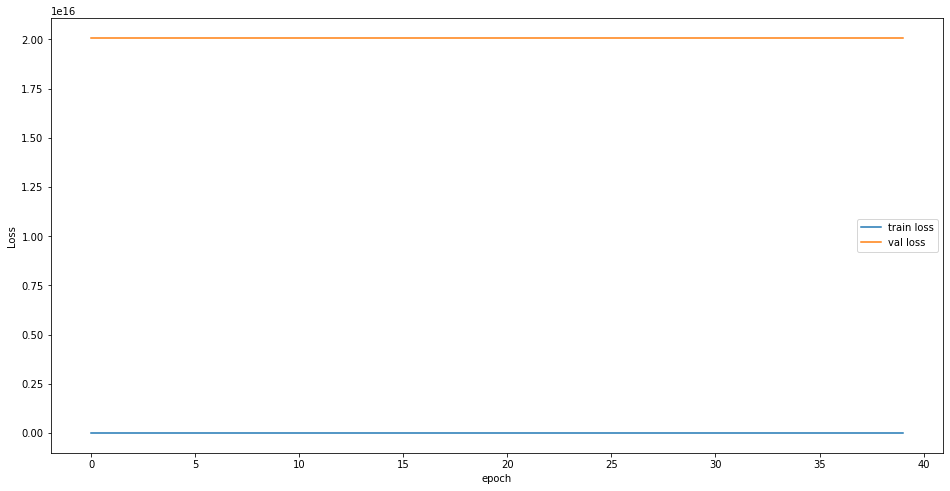

In [115]:
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

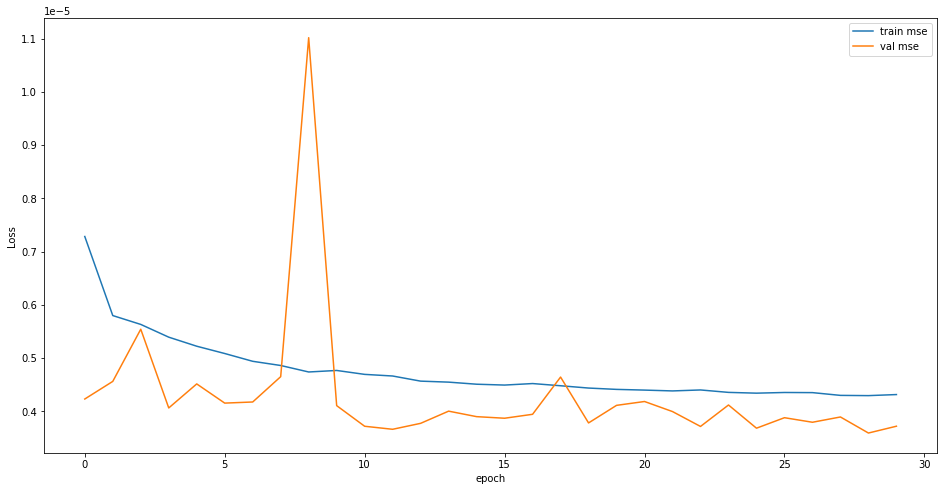

In [98]:
plt.figure(figsize=(16, 8))
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

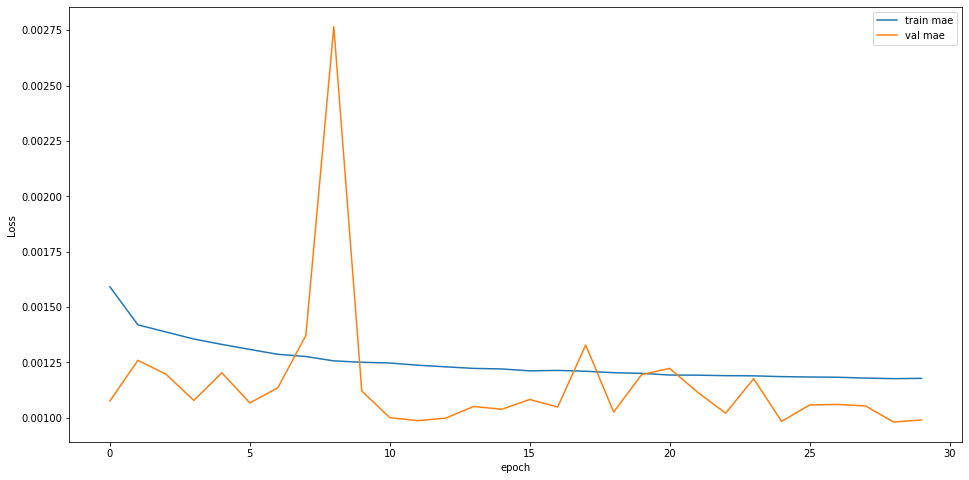

In [99]:
plt.figure(figsize=(16, 8))
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDis  (None, 1, 98, 64)        256       
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 21, 64)       

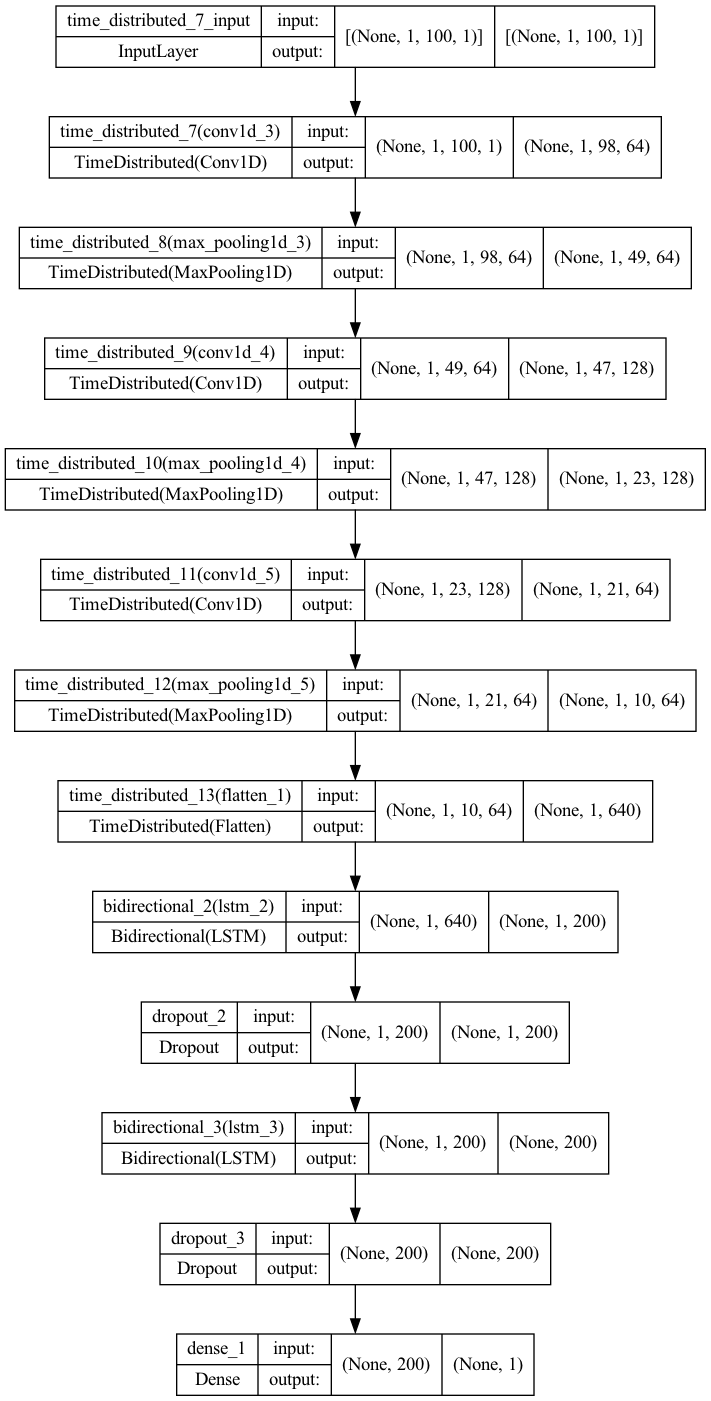

In [100]:
# Summarise the model
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [101]:
# Evaluate the model
model.evaluate(test_X, test_Y)

6702/6702 [==============================] - 20s 3ms/step - loss: 3.7188e-06 - mse: 3.7188e-06 - mae: 9.8939e-04


[3.7187548969086492e-06, 3.7187548969086492e-06, 0.000989393680356443]

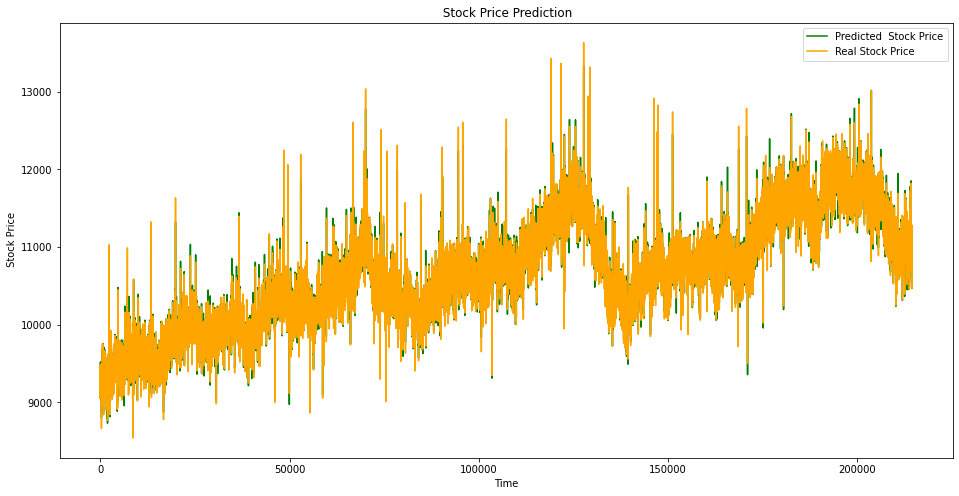

In [102]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

plt.figure(figsize=(16, 8))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'orange', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [64]:
predicted

array([[10659.032],
       [10697.709],
       [10764.249],
       ...,
       [12849.689],
       [12943.426],
       [12944.85 ]], dtype=float32)

### 6. Test the model

In [103]:
# In step 5, we had separated the testing data in df_test_to_scaled,
# we will use this df to prepare the test data further

df_test_scaled = scaler.fit(df_test_to_scaled)
df_test_scaled = scaler.transform(df_test_to_scaled)
print(df_test_scaled)

[[-0.09400185 -0.09642187 -0.10151676 ... -0.73901111 -0.66511861
   0.42311658]
 [-0.10284578 -0.10031724 -0.10275364 ... -0.73901111 -0.66511861
   0.42311658]
 [-0.09864492 -0.10160095 -0.10615506 ... -0.73901111 -0.66511861
   0.42311658]
 ...
 [ 1.60695101  1.61656807  1.60595107 ...  1.40309219  0.58559135
   1.13530138]
 [ 1.61185939  1.61068075  1.6131073  ...  1.40309219  0.58559135
   1.13530138]
 [ 1.61283222  1.63458417  1.61407913 ...  1.40309219  0.58559135
   1.13530138]]


In [104]:
X = []
Y = []
window_size=100
for i in range(1 , len(df_test) - window_size -1 , 1):
    first = df_test.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df_test.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df_test.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [105]:
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

95242
23811


In [110]:
# Load model
model2 = tf.keras.models.load_model("./model.h5")

In [113]:
# Evaluate the model on test data
model.evaluate(test_X, test_Y)

745/745 [==============================] - 2s 3ms/step - loss: 20088698062241792.0000 - mse: 20088698062241792.0000 - mae: 141077264.0000


[2.008869806224179e+16, 2.008869806224179e+16, 141077264.0]

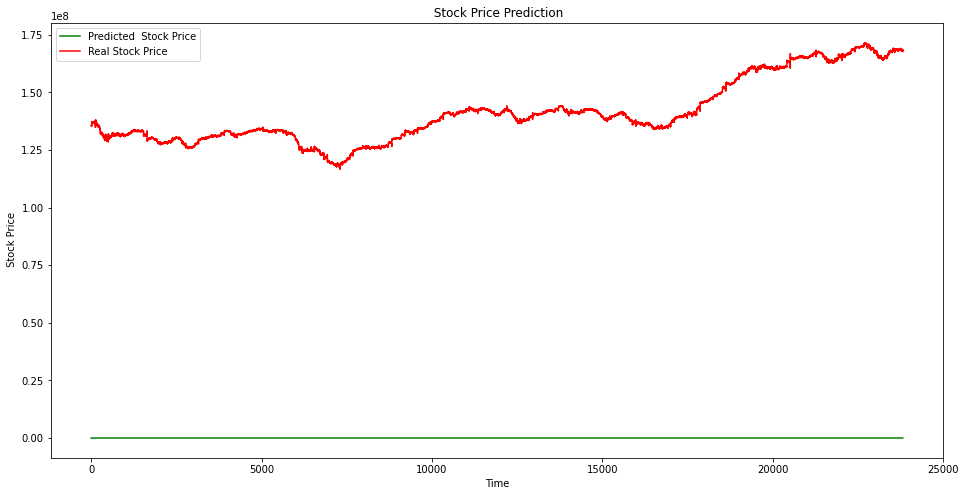

In [112]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df_test.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

plt.figure(figsize=(16, 8))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()